In [135]:
#read dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [136]:
data=pd.read_csv("titanic.csv")
data

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [137]:
print(data.columns.values)


['PassengerId' 'Name' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Survived']


In [138]:
data.info

<bound method DataFrame.info of      PassengerId                                               Name  Pclass  \
0              1                            Braund, Mr. Owen Harris       3   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2              3                             Heikkinen, Miss. Laina       3   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4              5                           Allen, Mr. William Henry       3   
..           ...                                                ...     ...   
886          887                              Montvila, Rev. Juozas       2   
887          888                       Graham, Miss. Margaret Edith       1   
888          889           Johnston, Miss. Catherine Helen "Carrie"       3   
889          890                              Behr, Mr. Karl Howell       1   
890          891                                Dooley, Mr. Patrick       3   

        Sex   Age  

In [139]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [140]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [141]:
#1 number of people suriveve
#0 for died 
#1for survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [142]:
#3survival rate
data[["Sex","Survived"]].groupby(['Sex'],as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


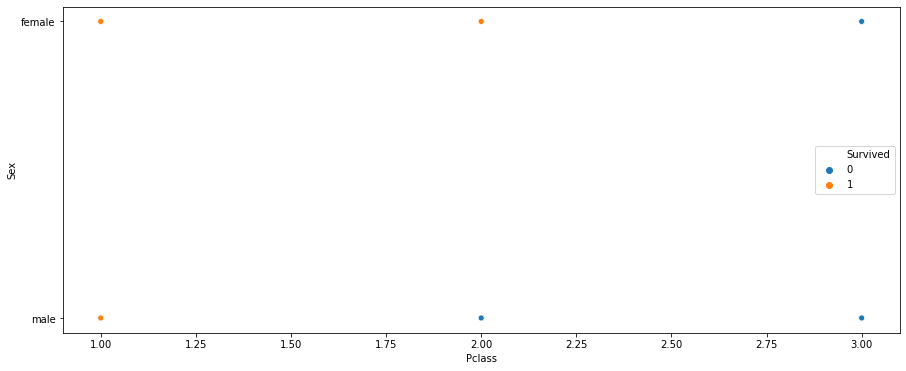

In [143]:
#visualize sex survival rate 
plt.figure(figsize=(15,6))
sns.scatterplot(data=data,x='Pclass',y='Sex',hue='Survived')

In [144]:
#4which class passenger suvived the most
data[['Survived','Sex','Pclass']].groupby(['Pclass','Sex']).sum()

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

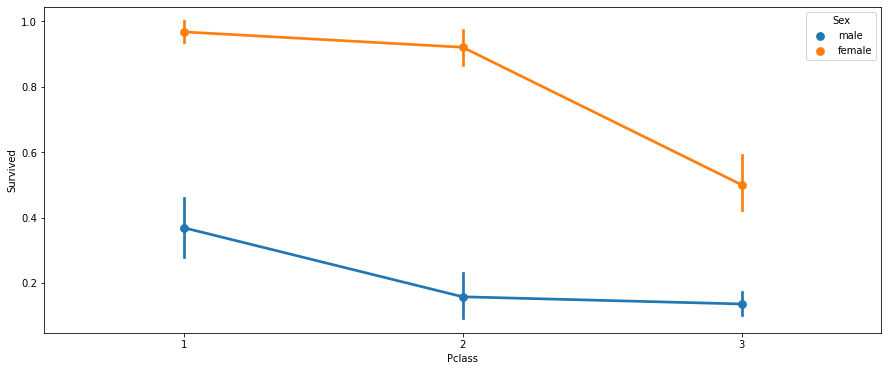

In [145]:
#visualize which class survive more
plt.figure(figsize=(15,6))
sns.pointplot(data=data,x='Pclass',y='Survived',hue='Sex')

In [146]:
#5 survival rate according to familly
data[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).sum()

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


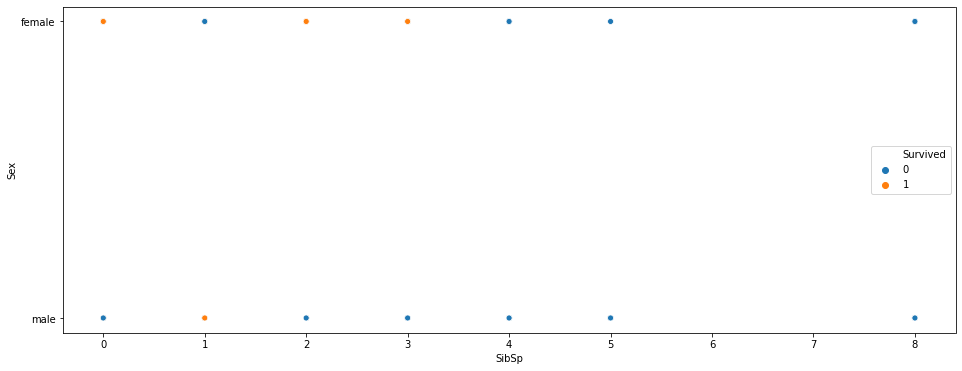

In [147]:
#visualize sex survival rate according to familly
plt.figure(figsize=(16,6))
sns.scatterplot(data=data,x='SibSp',y='Sex',hue='Survived')

# Data Preprocessing

In [148]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [149]:
#remove null value
data['Age'] = data['Age'].fillna(0)

In [150]:
#perform encoding
from sklearn.preprocessing import OneHotEncoder


In [151]:
#sparse by default is true which give us result in matrix form so we want in number
oh_encod=OneHotEncoder(sparse=False,drop="first")

In [152]:
#getdummies give us result in df but OneHotEncoder give output in array#
one=oh_encod.fit_transform(data[["Sex"]])
one

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [153]:
df=pd.DataFrame(one)
df

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [154]:
data["Sex"]=df
data

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.0,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,1.0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,1.0,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,0.0,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0.0,0.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,1.0,26.0,0,0,111369,30.0000,C148,C,1


In [155]:
x=data[['Age','Sex','Pclass','SibSp','Parch']]
x

,Age,Sex,Pclass,SibSp,Parch
0,22.0,1.0,3,1,0
1,38.0,0.0,1,1,0
2,26.0,0.0,3,0,0
3,35.0,0.0,1,1,0
4,35.0,1.0,3,0,0
...,...,...,...,...,...
886,27.0,1.0,2,0,0
887,19.0,0.0,1,0,0
888,0.0,0.0,3,1,2
889,26.0,1.0,1,0,0


In [156]:
y=data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# split data

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0,shuffle=True)

# feature scalling


In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lgc.fit(x_train,y_train)

C:\Users\ASIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [179]:
lgc.score(x_train,y_train)

0.7859281437125748

In [181]:
logistic_egression_score=lgc.score(x_test,y_test)
logistic_egression_score

0.7847533632286996

# knn algo

In [159]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=7)
cls.fit(x_train,y_train)

<ipython-input-159-b0a917790ef5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  cls.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [160]:
cls.score(x_train,y_train)

0.8353293413173652

In [166]:
knn_score=cls.score(x_test,y_test)
knn_score

0.7982062780269058

In [162]:
y_pred = cls.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [123]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[120  19]
 [ 26  58]]


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.75      0.69      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



# svm

In [125]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

C:\Users\ASIM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [126]:
svc.score(x_train,y_train)

0.7889221556886228

In [164]:
svm_score=svc.score(x_test,y_test)
svm_score

0.7802690582959642

# Decision tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dt.fit(x_train,y_train)

In [129]:
dtc.score(x_train,y_train)

0.9281437125748503

In [167]:
decision_tree_score=dtc.score(x_test,y_test)
decision_tree_score

0.8161434977578476

In [131]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1], dtype=int64)

# Random forest

In [132]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)

<ipython-input-132-171df9024dc0>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [133]:
rfc.score(x_train,y_train)

0.9206586826347305

In [168]:
random_forest_score=rfc.score(x_test,y_test)
random_forest_score

0.8071748878923767

# Results

In [183]:
results=pd.DataFrame({
    "Logistic Regression":(logistic_egression_score*100),
    "SVM":(svm_score*100),
    "kNN":(knn_score*100),
    "Decision Tree":(decision_tree_score*100),
    "Random forest":(random_forest_score*100)
},index=['Score'])
results

,Logistic Regression,SVM,kNN,Decision Tree,Random forest
Score,78.475336,78.026906,79.820628,81.61435,80.717489


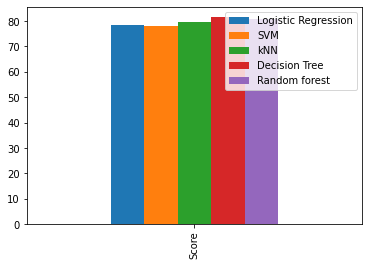

In [184]:
results.plot(kind='bar')